In [7]:
import os
import shutil
imgs = [
    # "01GSSAP_c1_d0_L1_000723",
    # "08EAGLE_c1_d0_L1_000384",
    # "12CH01_c1_d0_L2_000002",
    "14ACCESS_c1_d0_L1_000658",
    "16geoeye-1_c1_d0_L1_000524",
    "14ACCESS_c1_d0_L3_000808",
    "18deimos-2_new_c1_d0_L2_000414",
    "46tianlian-1_c1_d1_L1_000387",
    "01GSSAP_c1_d0_L1_000723",
    "08EAGLE_c1_d0_L1_000384"
]

imgs2 = [
    "data/UESAT_RGB_53/Screenshots0528/32aiji2/camera1/d0/L1/src/32aiji2_c1_d0_L1_000005.png",
    "data/UESAT_RGB_53/Screenshots0528/33GEO-Kompsat-2A/camera1/d0/L1/src/33GEO-Kompsat-2A_c1_d0_L1_000078.png",
    "data/UESAT_RGB_53/Screenshots0528/34GEO-Kompsat-2B/camera1/d0/L3/src/34GEO-Kompsat-2B_c1_d0_L3_000009.png",
    "data/UESAT_RGB_53/Screenshots0528/35KOMPSAT-5/camera1/d0/L2/src/35KOMPSAT-5_c1_d0_L2_000008.png",
    "data/UESAT_RGB_53/Screenshots0528/44TDRS-13/camera1/d0/L1/src/44TDRS-13_c1_d0_L1_000008.png",
    "data/UESAT_RGB_53/Screenshots0528/45LUCAS/camera1/d0/L3/src/45LUCAS_c1_d0_L3_000017.png",
    "data/UESAT_RGB_53/Screenshots0528/47SBIRSGEO/camera1/d1/L1/src/47SBIRSGEO_c1_d1_L1_000005.png",
    "data/UESAT_RGB_53/Screenshots0528/48Nemesis1_2/camera1/d0/L3/src/48Nemesis1_2_c1_d0_L3_000024.png",
    "data/UESAT_RGB_53/Screenshots0528/50WGS/camera1/d0/L2/src/50WGS_c1_d0_L2_000008.png",
    "data/UESAT_RGB_53/Screenshots0528/51Telstar18Vantage/camera1/d1/L1/src/51Telstar18Vantage_c1_d1_L1_000001.png",
    "data/UESAT_RGB_53/Screenshots0528/52Telstar19Vantage/camera1/d1/L2/src/52Telstar19Vantage_c1_d1_L2_000003.png",
    "data/UESAT_RGB_53/Screenshots0528/53Telstar14R/camera1/d0/L2/src/53Telstar14R_c1_d0_L2_000001.png",
    "data/UESAT_RGB_53/Screenshots0528/54Telstar12V/camera1/d0/L1/src/54Telstar12V_c1_d0_L1_000004.png",
    "data/UESAT_RGB_53/Screenshots0528/55Intelsat22/camera1/d0/L2/src/55Intelsat22_c1_d0_L2_000002.png",
    "data/UESAT_RGB_53/Screenshots0528/56MUOS-1/camera1/d0/L2/src/56MUOS-1_c1_d0_L2_000023.png",
    "data/UESAT_RGB_53/Screenshots0528/57SiriusXM_8/camera1/d1/L2/src/57SiriusXM_8_c1_d1_L2_000006.png",
    "data/UESAT_RGB_53/Screenshots0528/58Arachne/camera1/d0/L2/src/58Arachne_c1_d0_L2_000011.png",
    "data/UESAT_RGB_53/Screenshots0528/59MEV-1/camera1/d0/L1/src/59MEV-1_c1_d0_L1_000004.png",
    "data/UESAT_RGB_53/Screenshots0528/60ALOS3/camera1/d0/L1/src/60ALOS3_c1_d0_L1_000011.png",
    "data/UESAT_RGB_53/Screenshots0528/Gaofen-1/camera1/d0/L1/src/Gaofen-1_c1_d0_L1_000004.png",
    "data/UESAT_RGB_53/Screenshots0528/ROOSTER/camera1/d0/L2/src/ROOSTER_c1_d0_L2_000011.png"
]
srcpath = '../data/UESAT_RGB_53/MMdata/images/minival'
dstpath = '../data/UESAT_vis/imaegs'
os.makedirs(dstpath, exist_ok=True)
for img in imgs:
    shutil.copy(os.path.join(srcpath, img + '.png'), os.path.join(dstpath, img + '.png'))

In [11]:
import shutil
import os 



# Example usage
source_files = os.listdir('../data/UESAT_vis/images')
destination_path = '../data/UESAT_vis/label'
os.makedirs(destination_path,exist_ok=True)
for file in source_files:
    path = os.path.join('../data/UESAT_RGB_53/MMdata/annotations/minival', file)
    if os.path.exists(path):
        shutil.copy(path, destination_path)
    elif os.path.exists(path.replace('minival', 'train')):
        shutil.copy(path.replace('minival', 'train'), destination_path)
    elif os.path.exists(path.replace('minival', 'allval')):
        shutil.copy(path.replace('minival', 'allval'), destination_path)
    elif os.path.exists(path.replace('minival', 'minitest')):
        shutil.copy(path.replace('minival', 'minitest'), destination_path)
    else:
        print('File not found:', path)


In [12]:

from PIL import Image
import os
# import mmcv
from tqdm import tqdm
import numpy as np

palette=[[0, 0, 0],[255, 0, 0], [0, 255, 0],[255, 255, 0],[0, 0, 255],[255, 0, 255],[0, 0, 124],[202, 202, 202],[255, 255, 255],[0, 255, 255],[0, 124, 0]]
def visdata(img_path):
    # 推理给定图像

    # result to image
    label = Image.open(img_path).convert('L')
    seg_map = np.array(label)
    # color_seg = mmcv.visualization.palette2rgb(seg_map, palette)
    color_seg = np.zeros((seg_map.shape[0], seg_map.shape[1], 3), dtype=np.uint8)
    for label, color in enumerate(palette):
        color_seg[seg_map == label, :] = color

    out_file = img_path.replace('.png', 'color.png')
    os.makedirs(os.path.dirname(out_file), exist_ok=True)
    Image.fromarray(color_seg).save(out_file)



datapath='../data/UESAT_vis/label'
imgs=os.listdir(datapath)

for img in tqdm(imgs):
    img_path = os.path.join(datapath,img)
    visdata(img_path)




100%|██████████| 7/7 [00:00<00:00, 17.52it/s]


In [ ]:
source_files = os.listdir('../data/UESAT_vis/label')
destination_path = '../data/UESAT_vis/results'
os.makedirs(destination_path,exist_ok=True)
for file in source_files:
    path = os.path.join('../data/UESAT_vis/label', file)
    if path.endswith('color.png'):
        #copy
        shutil.copy(path, path.replace('UESAT_vis/label', 'UESAT_vis/results'))

a=f'sdfjklasfjkl{dafdas}'


        

In [ ]:
#合并两个txt文件
import os
with open('../data/UESAT_RGB_53/MMdata/sam5_VAE3n_kmeans.txt') as f:
    lines = f.readlines()
    with open('../data/UESAT_RGB_53/MMdata/sam5_VAE3n_kmeans_2.txt', 'a') as f2:
        for line in lines:
            f2.write(line)

In [14]:

from PIL import Image
import os
# import mmcv
from tqdm import tqdm
import numpy as np

palette=[[0, 0, 0],[255, 0, 0], [0, 255, 0],[255, 255, 0],[0, 0, 255],[255, 0, 255],[0, 0, 124],[202, 202, 202],[255, 255, 255],[0, 255, 255],[0, 124, 0]]
def visdata(img_path):
    # 推理给定图像

    # result to image
    label = Image.open(img_path).convert('L')
    seg_map = np.array(label)
    # color_seg = mmcv.visualization.palette2rgb(seg_map, palette)
    color_seg = np.zeros((seg_map.shape[0], seg_map.shape[1], 3), dtype=np.uint8)
    for label, color in enumerate(palette):
        color_seg[seg_map == label, :] = color

    out_file = img_path.replace('.png', 'color.png')
    os.makedirs(os.path.dirname(out_file), exist_ok=True)
    Image.fromarray(color_seg).save(out_file)



datapath='../data/HIL_resized/images/training'
imgs=os.listdir(datapath)

for img in tqdm(imgs):
    img_path = os.path.join(datapath,img)
    visdata(img_path)


  2%|▏         | 189/10420 [00:15<13:57, 12.22it/s]


KeyboardInterrupt: 

In [6]:
import os
import shutil
datapath='../data/HIL_resized/annotations/validation'
files=os.listdir(datapath)
for file in files:
    if file.startswith('eagel_sunlamp+lightroom'):
        

                # 获取文件名的数字部分
        num= file.split('_')[-2]
        suffix = int(num)
        # 判断是否在指定范围内
        if 115<= suffix <= 135:
            file_path = os.path.join(datapath, file)
            os.remove(file_path)
        elif suffix>135:
            pass
        else:
            if not file.startswith('eagel_sunlamp+lightroom_iso200_tv100_f5.6'):
                # copy file
                file_path = os.path.join(datapath, file)
                src_path = os.path.join(datapath, f'eagel_sunlamp+lightroom_iso200_tv100_f5.6_{num}_masked.png')
                if os.path.exists(src_path):
                    shutil.copy(src_path, file_path)
                else:
                    shutil.copy(src_path.replace('validation','training'), file_path)


In [8]:
import os
import shutil
datapath='../data/HIL_resized/images/training'
files=os.listdir(datapath)
for file in files:
    if file.startswith('eagel_sunlamp+lightroom'):
        

                # 获取文件名的数字部分
        num= file.split('_')[-2]
        suffix = int(num)
        # 判断是否在指定范围内
        if 115<= suffix <= 135:
            file_path = os.path.join(datapath, file)
            os.remove(file_path)

In [10]:
# get full train
import os
datapath = '../data/UESAT_RGB_53/MMdata/images/train'
files = os.listdir(datapath)
with open('../data/UESAT_RGB_53/MMdata/train.txt', 'w') as f:
    for file in files:
        if not file.endswith('masked.png'):
            f.write(file.rstrip('.png')+'\n')


In [2]:
import os
with open('../data/HIL_resized/HIL_sam_vae_5_kmeans.txt') as f:
    lines1 = f.readlines()
with open('../data/UESAT_RGB_53/MMdata/sam5_VAE3n_kmeans.txt', 'r') as f2:
    lines2 = f2.readlines()
lines = lines1 + lines2
with open('../data/UESAT_RGB_53/MMdata/VAE3n+HIL5.txt', 'w') as f3:
    for line in lines:
        f3.write(line.rstrip('.pn\n')+'\n')


[0 1]


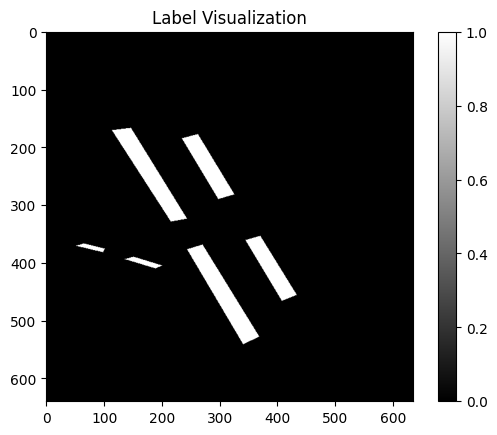

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 打开并转换标签图像
label = Image.open('../data/Realdataset/label/0001.png').convert('L')
label = np.array(label)

# 打印标签的唯一值
print(np.unique(label))

# 可视化标签图像
plt.imshow(label, cmap='gray')
plt.title('Label Visualization')
plt.colorbar()
plt.show()

In [6]:
import os
imgs = os.listdir('../data/Realdataset/image')
for img in imgs:
    if img.endswith('VAE3.png') or img.endswith('full.png') or img.endswith('Random.png'):
        os.remove(os.path.join('../data/Realdataset/image', img))

In [ ]:
import re
import numpy as np
import pandas as pd
import os

# 训练日志内容


# 正则表达式提取IoU信息
pattern0 = r'\+---------------\+-------\+-------\+([\s\S]+?)\+---------------\+-------\+-------\+([\s\S]+?)\+---------------\+-------\+-------\+'
pattern1 = r'\|\s+([a-z\s]+)\s+\|\s+([\d\.nan]+)\s+\|\s+([\d\.nan]+)\s+\|'





def extract_iou(log_content,taskname):
    tables = re.findall(pattern0, log_content)
    if tables:
        last_table = tables[-1].strip()

        matches = re.findall(pattern1, last_table, re.IGNORECASE)
        data = {}
        data['task'] = taskname
        iou_values = []
        for class_name, iou_str, acc_str in matches:
            try:
                iou = float(iou_str)
                if not np.isnan(iou) and iou > 0:  # 排除无效类别
                    data[class_name.strip()] = iou
                    iou_values.append(iou)
            except ValueError:
                continue

        mIoU = np.mean(iou_values) if iou_values else 0
        data['mIoU'] = mIoU
        return data
    else:
        print('No valid IoU values found in the log content.')
        return None
    
def get_all_log(work_dir):
    alllogs=[]
    for dirpath, dirnames, filenames in os.walk(work_dir):
        if 'epoch_5.pth' in filenames:
            # 
            dirnames.sort()
            for dirname in reversed(dirnames):
                logpath= os.path.join(dirpath,dirname,dirname+'.log')
                log_content = open(logpath).read()
                tables = re.findall(pattern0, log_content)
                if len(tables)==5:
                    taskname=dirpath.split('/')[-1]
                    alllogs.append([taskname,logpath])
                    break
    
    return alllogs
all_data = pd.DataFrame()
# 提取有效类别的IoU值
logs=get_all_log('../work_dirs')
for task,log in logs:
    log_c=open(log).read()
    data = extract_iou(log_c,task)
    if data:
        print(data)
        all_data = all_data.append(data, ignore_index=True)


csv_path = 'iou_values.csv'
all_data.to_csv(csv_path, index=False)
print(f"有效类别的IoU已保存到 {csv_path}")


KeyboardInterrupt: 

In [3]:
import re
import numpy as np
import pandas as pd

# 假设这是从文件读取的日志内容
log_content = """
2024/11/02 02:29:28 - mmengine - INFO -  
+---------------+-------+-------+
|     Class     |  IoU  |  Acc  |
+---------------+-------+-------+
|   background  | 99.85 | 99.94 |
|     panel     | 92.92 | 96.46 |
|     aerial    | 87.93 | 93.15 |
|     spout     |  61.5 | 69.46 |
|     camera    | 88.87 | 93.77 |
| panel support |  66.0 | 71.43 |
|  star sensor  | 41.85 | 45.93 |
|    docking    | 86.28 | 89.96 |
|      body     | 93.45 | 97.58 |
|      arm      |  nan  |  nan  |
|      part     | 76.43 |  84.6 |
|   rodaerial   |  0.0  |  0.0  |
| unkown aerial |  nan  |  nan  |
|     others    | 60.46 | 67.95 |
+---------------+-------+-------+
2024/11/03 03:30:29 - mmengine - INFO -  
+---------------+-------+-------+
|     Class     |  IoU  |  Acc  |
+---------------+-------+-------+
|   background  | 99.88 | 99.96 |
|     panel     | 93.01 | 96.51 |
|     aerial    | 88.02 | 93.25 |
|     spout     |  62.0 | 70.00 |
|     camera    | 89.10 | 94.00 |
| panel support |  67.0 | 72.00 |
|  star sensor  | 42.00 | 46.50 |
|    docking    | 87.00 | 90.50 |
|      body     | 94.00 | 98.00 |
|      arm      |  nan  |  nan  |
|      part     | 77.00 | 85.00 |
|   rodaerial   |  0.0  |  0.0  |
| unkown aerial |  nan  |  nan  |
|     others    | 61.00 | 68.00 |
+---------------+-------+-------+
"""

# 使用正则表达式匹配每段IoU表，并提取最后一个
pattern = r'\+---------------\+-------\+-------\+([\s\S]+?)\+---------------\+-------\+-------\+'
tables = re.findall(pattern, log_content)

# 提取最后一个表
if tables:
    last_table = tables[-1].strip()

    # 解析最后一个表中的IoU信息
    iou_pattern = r'\|\s+([a-z\s]+)\s+\|\s+([\d\.nan]+)\s+\|\s+([\d\.nan]+)\s+\|'
    matches = re.findall(iou_pattern, last_table, re.IGNORECASE)

    # 提取有效类别的IoU值
    data = {}
    for class_name, iou_str, acc_str in matches:
        try:
            iou = float(iou_str)
            if not np.isnan(iou) and iou > 0:  # 排除无效类别
                data[class_name.strip()] = iou
        except ValueError:
            continue

    # 将单个日志的数据转换为DataFrame行并添加到总表
    df_row = pd.DataFrame([data])
    all_data = pd.concat([pd.DataFrame(), df_row], ignore_index=True)

    # 保存到CSV文件
    csv_path = 'last_log_iou_values.csv'
    all_data.to_csv(csv_path, index=False)
    print(f"最后一个IoU表的有效数据已保存到 {csv_path}")
else:
    print("未找到IoU结果表")


最后一个IoU表的有效数据已保存到 last_log_iou_values.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import os
data_path='../data/UESAT_RGB_53/Screenshots0528'
task_name='uesatL_sam_full'

features=[]
img_paths = []
for i in range(11):
    fea_data=np.load(os.path.join(data_path, task_name+f"{i+1}.npz"))
    features.extend(fea_data["features"])
    img_paths.extend(fea_data["img_names"])

features = np.array(features)
features = features.reshape(features.shape[0], -1)


In [12]:
data_path='../data/UESAT_RGB_53/Screenshots0528'
task_name='uesatL_SAM_vae3_full'

features1=[]
img_paths1 = []
for i in range(11):
    fea_data=np.load(os.path.join(data_path, task_name+f"{i+1}.npz"))
    features1.extend(fea_data["features"])
    img_paths1.extend(fea_data["img_names"])

features1 = np.array(features1)
features1 = features1.reshape(features1.shape[0], -1)

In [13]:
import random
full_list = [os.path.basename(path.rstrip('.png\n')) for path in img_paths1]
with open('../data/UESAT_RGB_53/MMdata/sam5_VAE3_kmeans.txt') as f:
    subset = [line.rstrip('\n') for line in f.readlines()]
# flattened_array = array.reshape(array.shape[0], array.shape[1], -1)
# subset=random.sample(subset1, 254)
# 假设核心数据的索引列表和完整数据的索引列表
num_samples = features1.shape[0]
core_indices1 = np.random.choice(num_samples, size=25400, replace=False)
core_indices_vae = [full_list.index(item) for item in subset]

In [10]:
import random
full_list = [os.path.basename(path.rstrip('.png\n')) for path in img_paths]
with open('../data/UESAT_RGB_53/MMdata/sam5_VAE3n_kmeans.txt') as f:
    subset = [line.rstrip('\n') for line in f.readlines()]
# flattened_array = array.reshape(array.shape[0], array.shape[1], -1)
# subset=random.sample(subset1, 254)
# 假设核心数据的索引列表和完整数据的索引列表
num_samples = features.shape[0]
core_indices1 = np.random.choice(num_samples, size=25400, replace=False)
core_indices2 = [full_list.index(item) for item in subset]

In [4]:
import umap

umap_reducer = umap.UMAP(n_components=2, random_state=42)
data_reduced = umap_reducer.fit_transform(features)

/home/buaa22/anaconda3/envs/openmmlab/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-08 00:35:20.685356: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-08 00:35:20.695786: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-08 00:35:20.707886: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-08 00

In [6]:

pca = PCA(n_components=2)
data_reduced1 = pca.fit_transform(features)

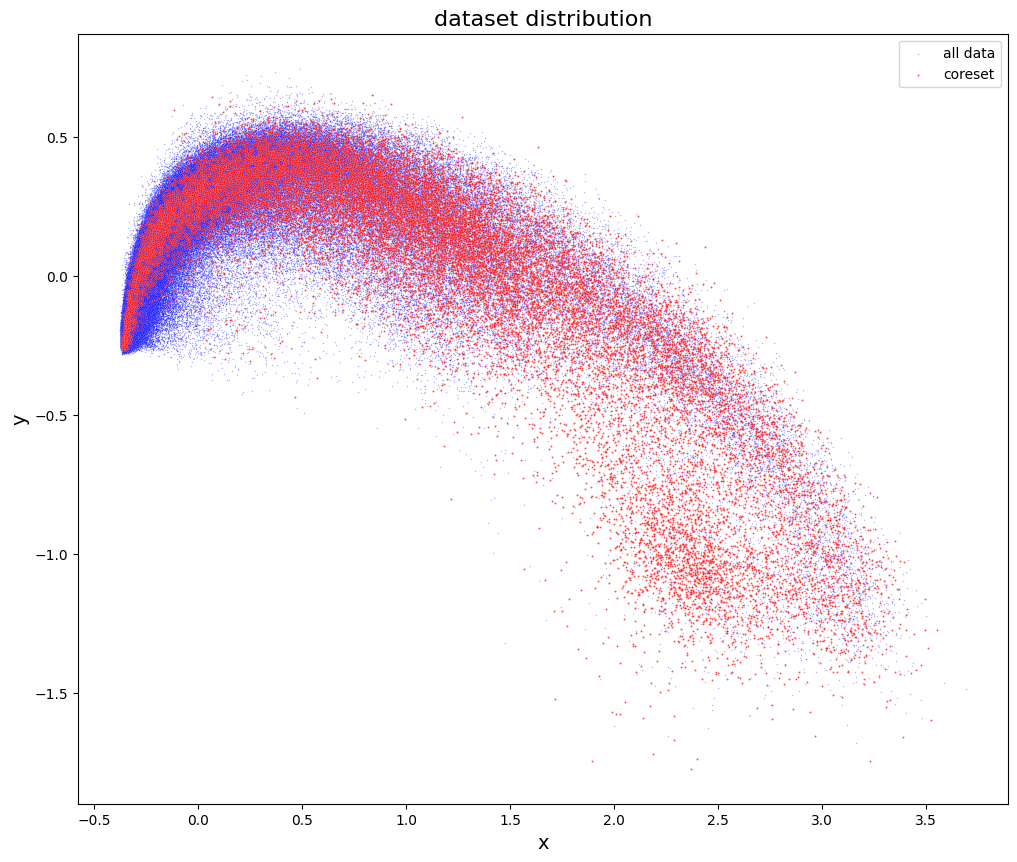

In [ ]:
plt.figure(figsize=(12, 10))
# data = np.random.choice(data_reduced, size=int(data_reduced.size[0]*0.01), replace=False)
# 绘制完整数据（非核心数据）
sns.scatterplot(x=data_reduced1[~np.isin(np.arange(num_samples), np.array(core_indices2)), 0],
                y=data_reduced1[~np.isin(np.arange(num_samples), np.array(core_indices2)), 1],
                alpha=0.3, s=1, label='all data', color='blue')

# 绘制核心数据
sns.scatterplot(x=data_reduced1[core_indices2, 0],
                y=data_reduced1[core_indices2, 1],
                alpha=0.7, s=2, label='coreset', color='red')

# 添加图标题和标签
plt.title('dataset distribution', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()

# 显示图形
plt.show()

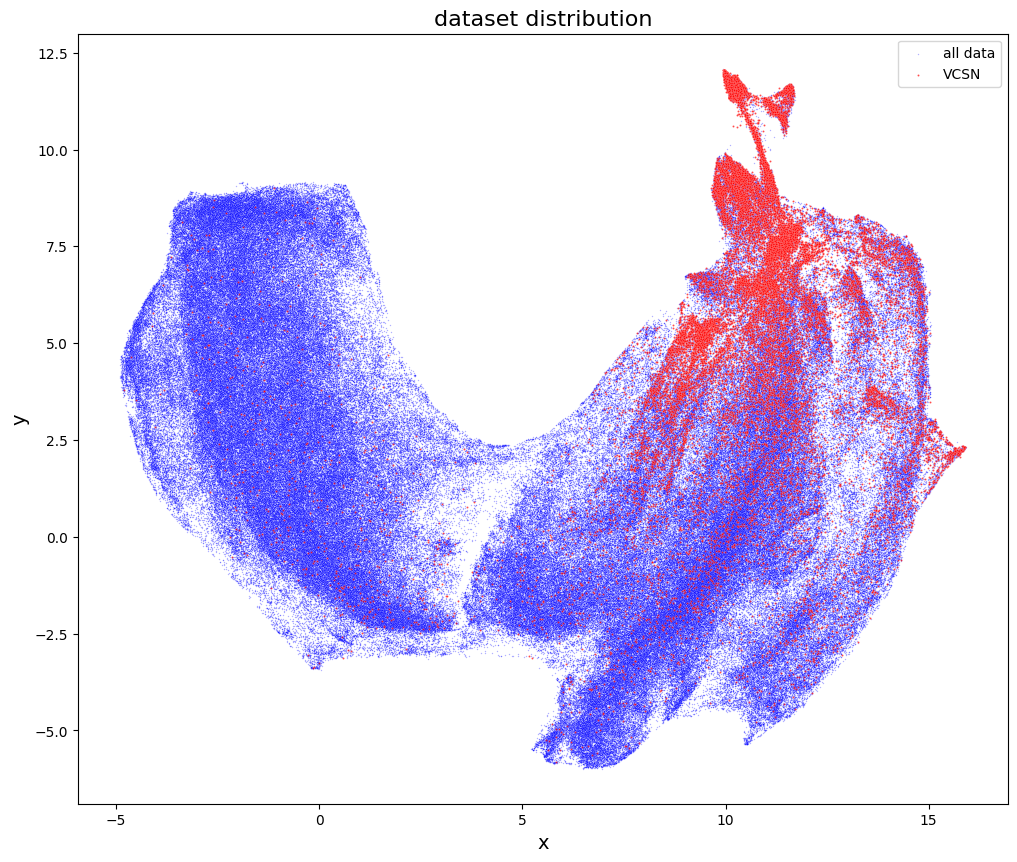

In [15]:
# 使用不同的颜色绘制核心数据和完整数据
core_indices = core_indices2
plt.figure(figsize=(12, 10))
# data = np.random.choice(data_reduced, size=int(data_reduced.size[0]*0.01), replace=False)
# 绘制完整数据（非核心数据）
sns.scatterplot(x=data_reduced[~np.isin(np.arange(num_samples), np.array(core_indices2)), 0],
                y=data_reduced[~np.isin(np.arange(num_samples), np.array(core_indices2)), 1],
                alpha=0.3, s=1, label='all data', color='blue')

# 绘制核心数据
sns.scatterplot(x=data_reduced[core_indices2, 0],
                y=data_reduced[core_indices2, 1],
                alpha=0.7, s=2, label='VCSN', color='red')

# 添加图标题和标签
plt.title('dataset distribution', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()

# 显示图形
plt.show()

In [6]:
import json
import os
import csv
from tqdm import tqdm
import numpy as np
from scipy.spatial.transform import Rotation as R

def euler2quat(roll, pitch, yaw):
    """
    将欧拉角转换为四元数
    :param roll: 滚转角
    :param pitch: 俯仰角
    :param yaw: 偏航角
    :return: 四元数 [qx, qy, qz, qw]
    """
    qx = np.sin(roll/2) * np.cos(pitch/2) * np.cos(yaw/2) - np.cos(roll/2) * np.sin(pitch/2) * np.sin(yaw/2)
    qy = np.cos(roll/2) * np.sin(pitch/2) * np.cos(yaw/2) + np.sin(roll/2) * np.cos(pitch/2) * np.sin(yaw/2)
    qz = np.cos(roll/2) * np.cos(pitch/2) * np.sin(yaw/2) - np.sin(roll/2) * np.sin(pitch/2) * np.cos(yaw/2)
    qw = np.cos(roll/2) * np.cos(pitch/2) * np.cos(yaw/2) + np.sin(roll/2) * np.sin(pitch/2) * np.sin(yaw/2)
    return np.array([qx, qy, qz, qw])

def quat2euler(quat):
    """
    将四元数转换为欧拉角
    :param quat: 四元数 [qx, qy, qz, qw]
    :return: 欧拉角 [roll, pitch, yaw]
    """
    r = R.from_quat(quat)
    return r.as_euler('xyz', degrees=True)

def euler2quatt(pitch, yaw, roll):
    """Convert euler angles in degrees to a quaternion"""

    cos_pitch = np.cos(pitch * 0.5)
    sin_pitch = np.sin(pitch * 0.5)
    cos_yaw = np.cos(yaw * 0.5)
    sin_yaw = np.sin(yaw * 0.5)
    cos_roll = np.cos(roll * 0.5)
    sin_roll = np.sin(roll * 0.5)

    qx = -sin_yaw * cos_roll * cos_pitch - cos_yaw * sin_roll * sin_pitch
    qy = -cos_yaw * sin_roll * cos_pitch + sin_yaw * cos_roll * sin_pitch
    qz = sin_yaw * sin_roll * cos_pitch - cos_yaw * cos_roll * sin_pitch
    qw = cos_yaw * cos_roll * cos_pitch + sin_yaw * sin_roll * sin_pitch

    return np.array([qx, qy, qz, qw])

r_camera, p_camera, y_camera = 0, 0, -90
r_camera = np.radians(r_camera)
p_camera = np.radians(p_camera)
y_camera = np.radians(y_camera)
quat_camera = euler2quat(r_camera, p_camera, y_camera)
quat_camera_inv = R.from_quat(quat_camera).inv().as_quat()

imgname='data/UESAT_vis/images/14ACCESS_c1_d0_L1_000658.png'

r_target, p_target, y_target = 102.283,78.6136, -178.988
r_target = np.radians(r_target) 
p_target = np.radians(p_target)
y_target = np.radians(y_target)
quat_target = euler2quat(r_target, p_target, y_target)
quat_relative = R.from_quat(quat_camera_inv) * R.from_quat(quat_target)
euler_relative = quat2euler(quat_relative.as_quat())

# print(euler_relative)
r=euler_relative[0]
p=euler_relative[1]
y=euler_relative[2]
# r,p,y=-39.4406,-11.1028, -139.621
# 度转弧度
r = np.radians(r)
p = np.radians(p)
y = np.radians(y)
sat_quat=euler2quatt(-r,-p,y)
sq=''
for q in sat_quat:
    sq+=str(q)+','
print(sat_quat)
print(sq)

[-1.38769611e-01  6.92097938e-01  7.08338269e-01  5.79546420e-04]
-0.13876961136098365,0.6920979383338811,0.7083382686560569,0.0005795464197874689,
